In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm
import random

In [212]:
# zgrep 'rs1154155:' /labs/mignot/DGN2019_Imputations/CHR14_GenRED.II.autosomalClean.Final.impute.gz
# --- rs1154155:23002684:T:G 23002684 T G 
scores = "1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.986 0.014 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0.578 0.422 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0.998 0.002 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0.995 0.005 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0.997 0.003 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0.997 0.003 0 1 0 0 0.998 0.002 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0.966 0.034 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0.643 0.357 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0.996 0.004 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0.995 0.004 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0.980 0.020 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0.363 0.637 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.978 0.022 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0.036 0.963 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0.996 0.004 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0.637 0.363 0 1 0 0 1 0 0 1 0 0 0.117 0.883 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0.997 0.003 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.095 0.905 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.013 0.987 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0.012 0.988 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0.012 0.988 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0.995 0.005 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0.999 0.001 0 1 0 0 0.999 0.001 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0.997 0.003 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0.007 0.993 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0.941 0.059 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0.999 0.001 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0.988 0.012 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0.991 0.009 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.989 0.011 0 0 1 0 0 1 0 1 0 0 1 0 0 0.178 0.822 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0.897 0.103 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0.326 0.666 0.009 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0.016 0.984 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.962 0.038 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0.962 0.038 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0.720 0.280 0 0.014 0.986 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0.294 0.706 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0.638 0.362 0 1 0 0 1 0 0 0 1 0 1 0 0 0.998 0.002 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0.997 0.003 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0.001 0.999 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0.004 0.996 0 0 1 0 1 0 0 1 0 0 0.793 0.207 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0.948 0.052 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0.009 0.991 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0.022 0.978 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0.395 0.605 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0.989 0.011 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.940 0.060 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.991 0.009 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0.654 0.346 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0.946 0.054 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.023 0.977 0 1 0 0 1 0 0 1 0 0 0.002 0.998 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.664 0.333 0.003 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0.005 0.995 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0.999 0.001 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0.981 0.019 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.774 0.226 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0.991 0.009 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0.004 0.996 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0.112 0.888 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.995 0.005 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0.996 0.004 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0.925 0.075 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0.314 0.686 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0.014 0.986 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0.989 0.011 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.995 0.005 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0.994 0.006 0 1 0 0 1 0 0 1 0 0 0.950 0.050 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.999 0.001 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0.020 0.980 0 0.363 0.637 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.998 0.002 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0.999 0.001 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0.006 0.994 0 1 0 0 1 0 0 1 0 0 0.996 0.004 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.974 0.026 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0.896 0.104 1 0 0 0 0.004 0.996 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0.865 0.135 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0.001 0.999 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.025 0.975 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0.163 0.837 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0.997 0.003 0 1 0 0 1 0 0 1 0 0 0.941 0.059 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0.989 0.011 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0.642 0.358 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0.824 0.176 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0.334 0.666 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0.972 0.028 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0.999 0.001 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0.998 0.002 0 1 0 0 0 1 0 1 0 0 0.363 0.637 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0.952 0.048 0 1 0 0 0 1 0 1 0 0 0.086 0.914 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0.968 0.032 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0.993 0.007 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0.566 0.434 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1"

In [213]:
scores = [float(x) for x in scores.split(" ")]

In [214]:
print("There are {} people".format(len(scores)//3))

There are 2226 people


In [215]:
assert len(scores) % 3 == 0

In [216]:
scores = [scores[i:i+3] for i in range(0, len(scores)-2, 3)] # split into groups of 3

In [217]:
genotypes = np.array([np.argmax(score) for score in scores])

(array([1588.,    0.,    0.,    0.,    0.,  587.,    0.,    0.,    0.,
          51.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

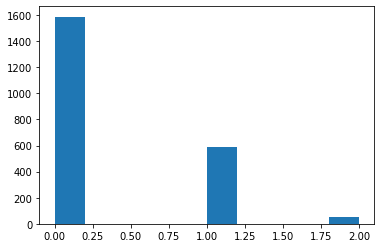

In [218]:
plt.hist(genotypes)

In [219]:
df = pd.read_csv("/labs/mignot/DGN2019_Imputations/GenRED.II.autosomalClean.Final_CHR14.sample", delimiter=" ")

In [220]:
ids_arr = df.ID_1.apply(lambda x: x.split("_")[-1])

In [221]:
ids = ids_arr.values[1:] # first row is placeholder?
len(ids)

2226

In [222]:
assert len(ids) == len(scores)

In [223]:
geno_df = pd.DataFrame()

In [224]:
geno_df['patid'] = ids
geno_df['rs1154155'] = genotypes

In [225]:
geno_df

,patid,rs1154155
0,LD0014,0
1,LD0041,0
2,LD0038,0
3,LD0084,0
4,LD0022,1
...,...,...
2221,286-60708,0
2222,286-60676,0
2223,286-60685,1
2224,GPC-270-23470,0


In [226]:
# only want patids in Sharon's paper, N=895
sharon_counts_df = pd.read_csv("gene_counts.tsv", delimiter="\t")
sharon_counts_df = sharon_counts_df.reset_index()
sharon_ids = set(sharon_counts_df.columns[1:])
geno_df = geno_df[geno_df['patid'].isin(sharon_ids)] 

In [228]:
usage_df = pd.read_csv("allVDJRatios.csv", index_col="patid").reset_index()

In [229]:
merged_df = pd.merge(geno_df, usage_df, on="patid", how="inner")
merged_df.head()

,patid,rs1154155,transcript,usage_ratio
0,LD0014,0,TRAJ1*01,0.001019
1,LD0014,0,TRAJ10*01,0.009171
2,LD0014,0,TRAJ11*01,0.004076
3,LD0014,0,TRAJ12*01,0.007473
4,LD0014,0,TRAJ13*01,0.005095


In [230]:
merged_df.to_csv("TCR_usage_rs1154155.csv", index=None)

In [231]:
family = "TRAJ24"

In [232]:
merged_df = merged_df[merged_df['family'] == family]

KeyError: 'family'

In [ ]:
#merged_df['usage_ratio'] = np.log(merged_df['usage_ratio'])

In [ ]:
X = merged_df['rs1154155'].values
y = merged_df['usage_ratio'].values
XX = sm.add_constant(X.flatten())
mod = sm.OLS(y, XX)
res = mod.fit()
slope = res.params[1]
p = res.pvalues[1]
print('Parameters: ', res.params)
print('R2: ', res.rsquared)
print('p values:', res.pvalues)

fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(x="rs1154155", y="usage_ratio", data=merged_df, ax=ax, fliersize=1)
sns.regplot(x="rs1154155", y="usage_ratio", data=merged_df, x_estimator=np.mean, color="yellow", ax=ax, label="Mean Estimator, slope={:e}, p={:e}".format(slope, p))
plt.xlabel("rs1154155:23002684:T:G")
plt.ylabel("usage")
plt.legend()
plt.title(family)

In [ ]:
def drawFamilyBoxPlots(query_transcripts, plot_column="ratio"):
    # query_transcripts can be single, or list of multiple, which will be summed together
    summed_plot_column = "summed_{}".format(plot_column)
    
    # filter out rows that match query_transcripts
    filtered_transcripts_df = df_with_total[df_with_total['transcript'].isin(query_transcripts)]
    
    # sum up all row values by groupby patid
    summed_filtered_transcripts_df = filtered_transcripts_df[['patid', plot_column]].groupby('patid').sum().reset_index().rename(columns={plot_column:summed_plot_column})
    
    # add metadata about genotypes and dose
    plot_df = pd.merge(summed_filtered_transcripts_df, patid_genotype_df)

    fig, ax = plt.subplots()
    sns.boxplot(x="genotype", y=summed_plot_column, data=plot_df, order=["GG", "GC", "CC"], ax=ax)
    sns.regplot(x="dose", y=summed_plot_column, data=plot_df, x_estimator=np.mean, color="yellow", ax=ax, label="Mean Estimator")
    #sns.scatterplot(x="dose", y=summed_plot_column, data=plot_df)
    X = plot_df['dose'].values
    y = plot_df[summed_plot_column].values
    XX = sm.add_constant(X.flatten())
    mod = sm.OLS(y, XX)
    res = mod.fit()
    print('Parameters: ', res.params)
    print('R2: ', res.rsquared)
    print('p values:', res.pvalues)
    print(res.summary())
    
    plt.legend()
    plt.title("BLAST {} {}".format(query_transcripts, summed_plot_column))